In [1]:
# Data handling and numerical operations
import pandas as pd                                 # Data manipulation and analysis
import numpy as np
import math                                  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt                     # Plotting graphs
import seaborn as sns                               # Advanced data visualization

# Scikit-learn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Utility libraries
%matplotlib inline
# Downloading NLTK resources
# nltk.download('stopwords')

# Other libraries
from scipy.stats import skew, kurtosis, iqr
import logging

# Setting up the environment
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.dpi'] = 500
sns.set_style("whitegrid", {'axes.grid' : False})
logging.basicConfig(level=logging.WARNING, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
df = pd.read_feather("../Data/Full_Data.feather")

In [3]:
df.head(5)

,text,sentiment
0,video offic mind busi david solomon tell gs intern learn wa,0
1,price lumber lb f sinc hit ytd high maci turnaround still happen,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict new crypto entrant go zero,1
4,satellit avoid attack space junk circl earth paid,-1


In [4]:
X = df['text']
Y = df['sentiment']

In [5]:
le =LabelEncoder()
y = le.fit_transform(Y)
y

array([1, 1, 0, ..., 2, 2, 0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


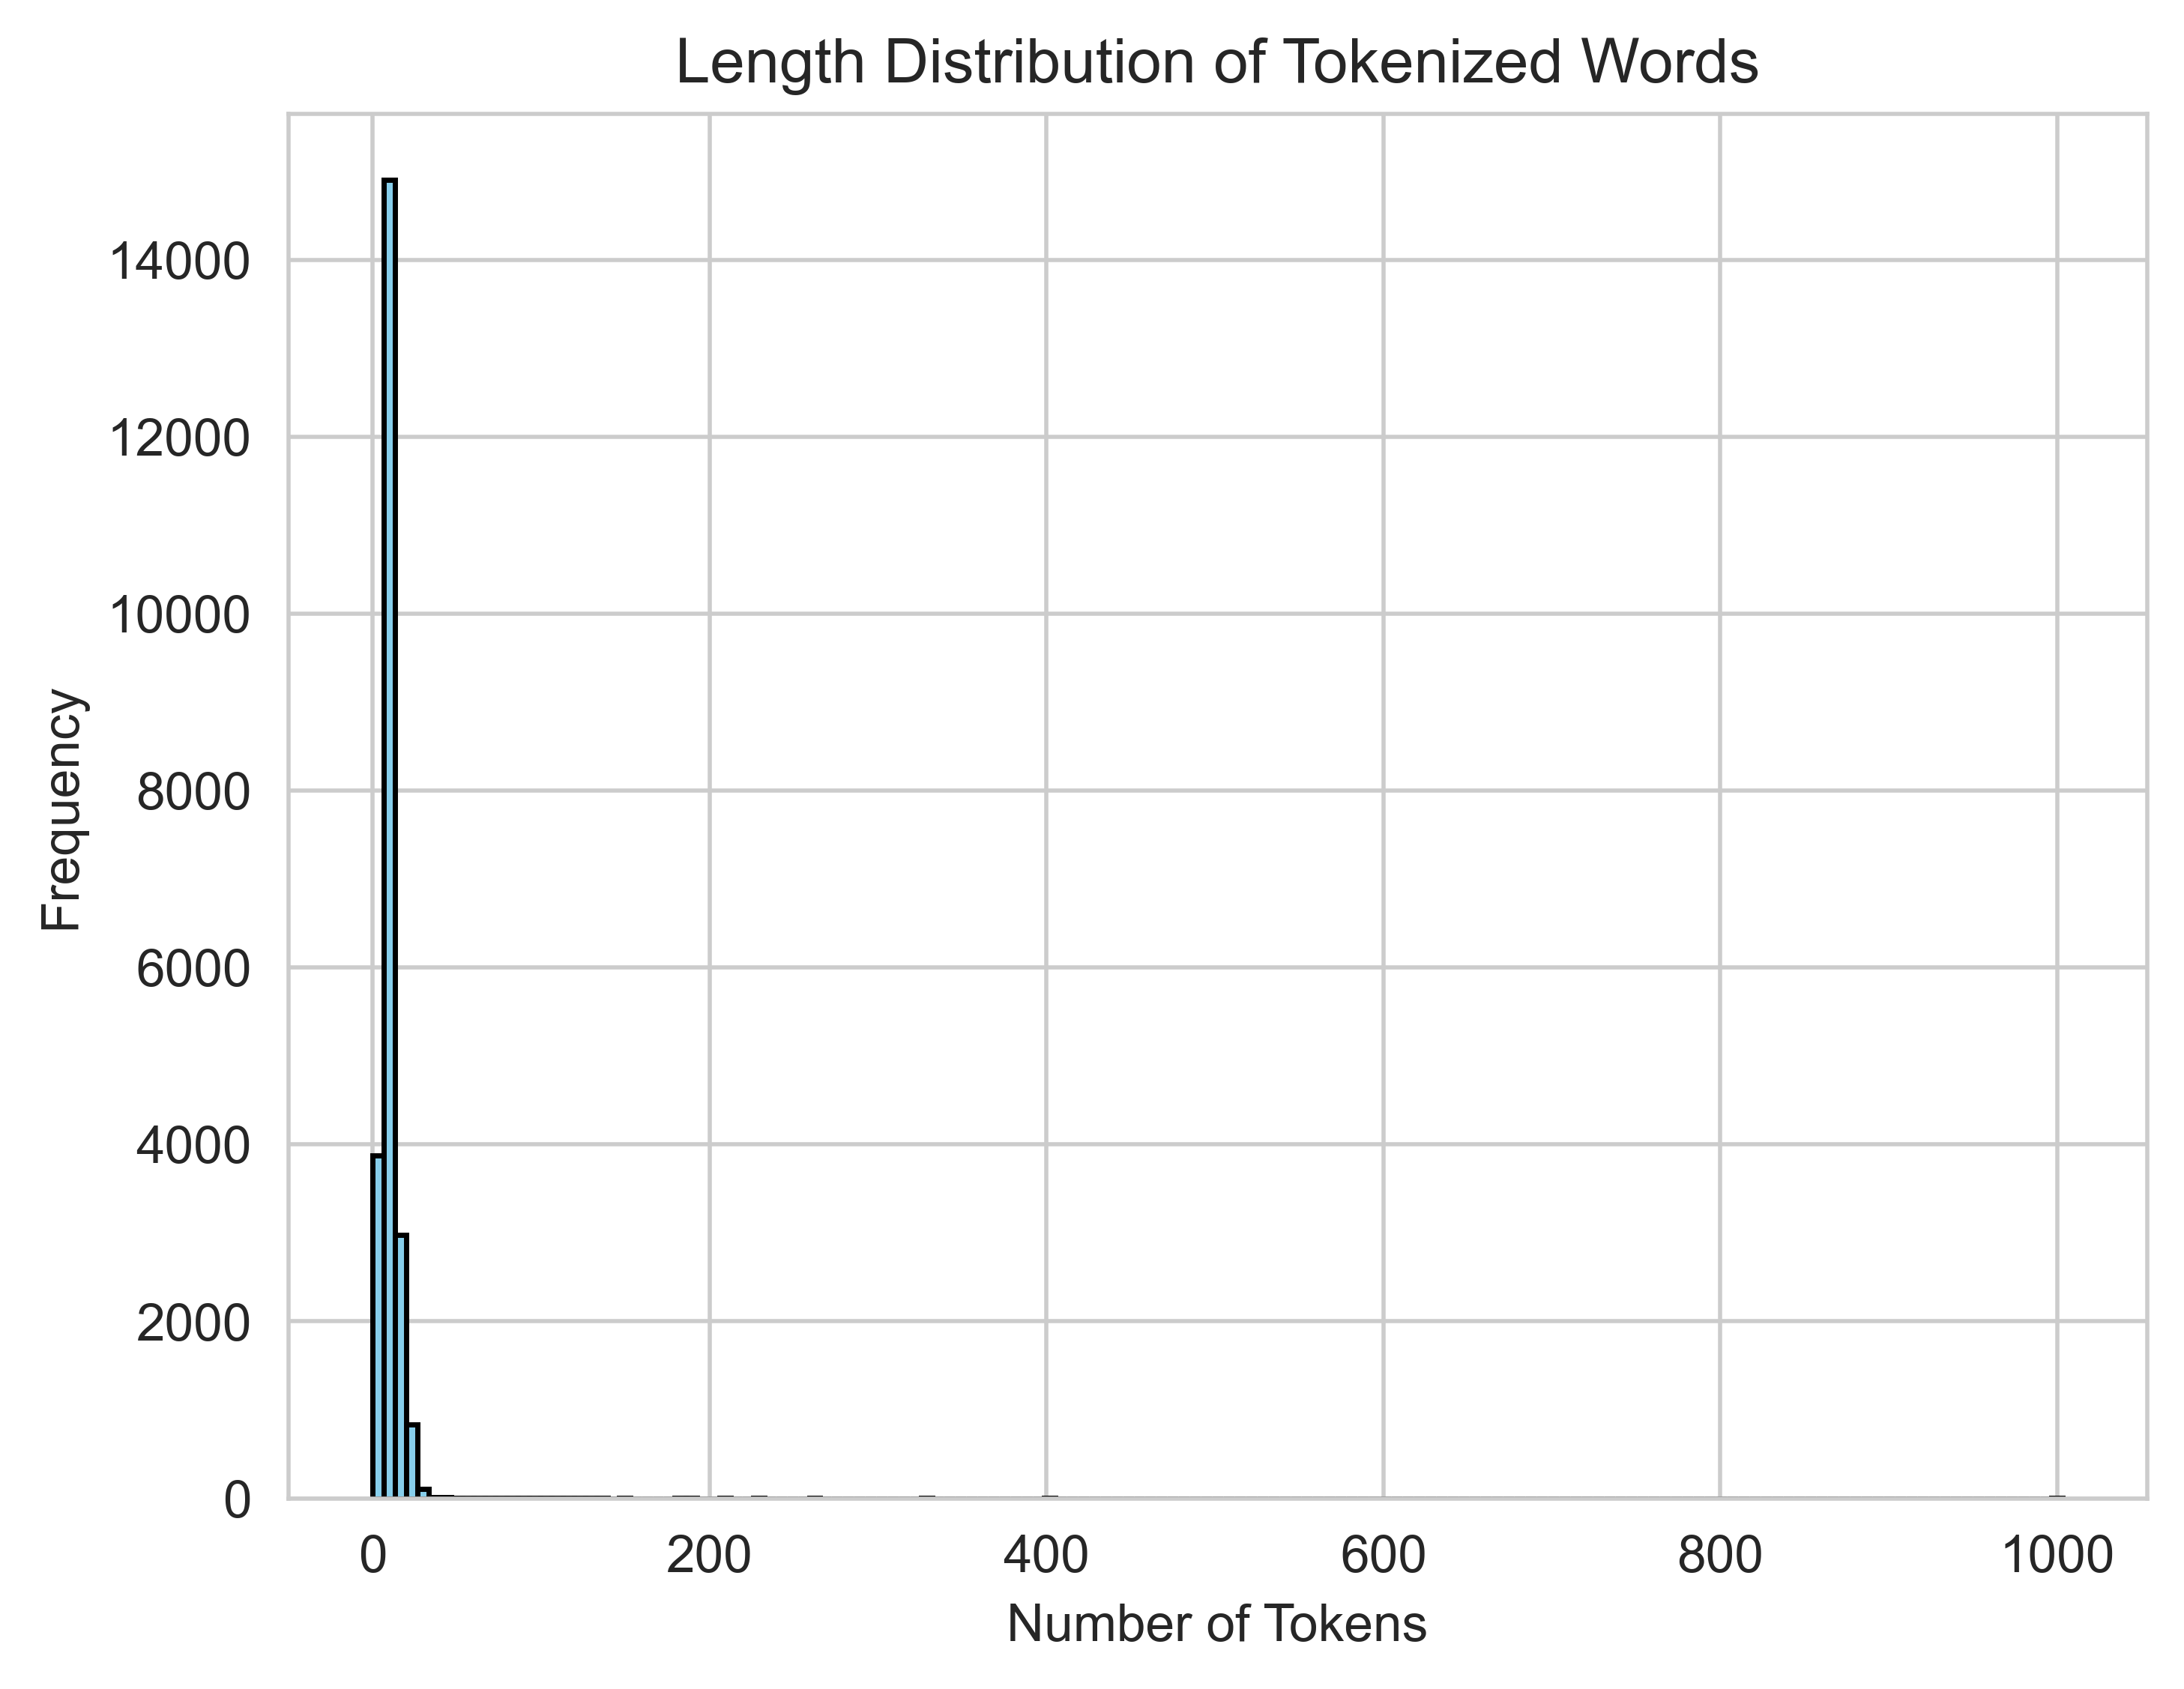

In [7]:
# checking the max length required for padding
token_lengths = [len(tokens) for tokens in X_train_seq]
plt.hist(token_lengths, bins=math.ceil(np.sqrt(len(token_lengths))), color='skyblue', edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Length Distribution of Tokenized Words')
plt.grid(True)
plt.show()

In [8]:
np.mean(token_lengths)+ np.std(token_lengths)

19.987885848824924

In [9]:
max_sequence_length = 40
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Define CNN model
embedding_dim = 100
num_filters = 128
kernel_size = 5
vocab_size = len(tokenizer.word_index) + 1
num_classes = len(set(y_train))


In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Conv1D(filters=num_filters, kernel_size=4, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [11]:

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Train model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10


143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6366 - loss: 0.8374 - val_accuracy: 0.8211 - val_loss: 0.4851
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8937 - loss: 0.2977 - val_accuracy: 0.8393 - val_loss: 0.4393
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9558 - loss: 0.1275 - val_accuracy: 0.8479 - val_loss: 0.5466
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9815 - loss: 0.0610 - val_accuracy: 0.8417 - val_loss: 0.6889
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9897 - loss: 0.0346 - val_accuracy: 0.8364 - val_loss: 0.8335
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9943 - loss: 0.0208 - val_accuracy: 0.8411 - val_loss: 0.8348
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9963 - loss: 0.0129 - val_accuracy: 0.8406 - val_loss: 0.9062
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9978 - loss: 0.0074 - val_accuracy: 0.837

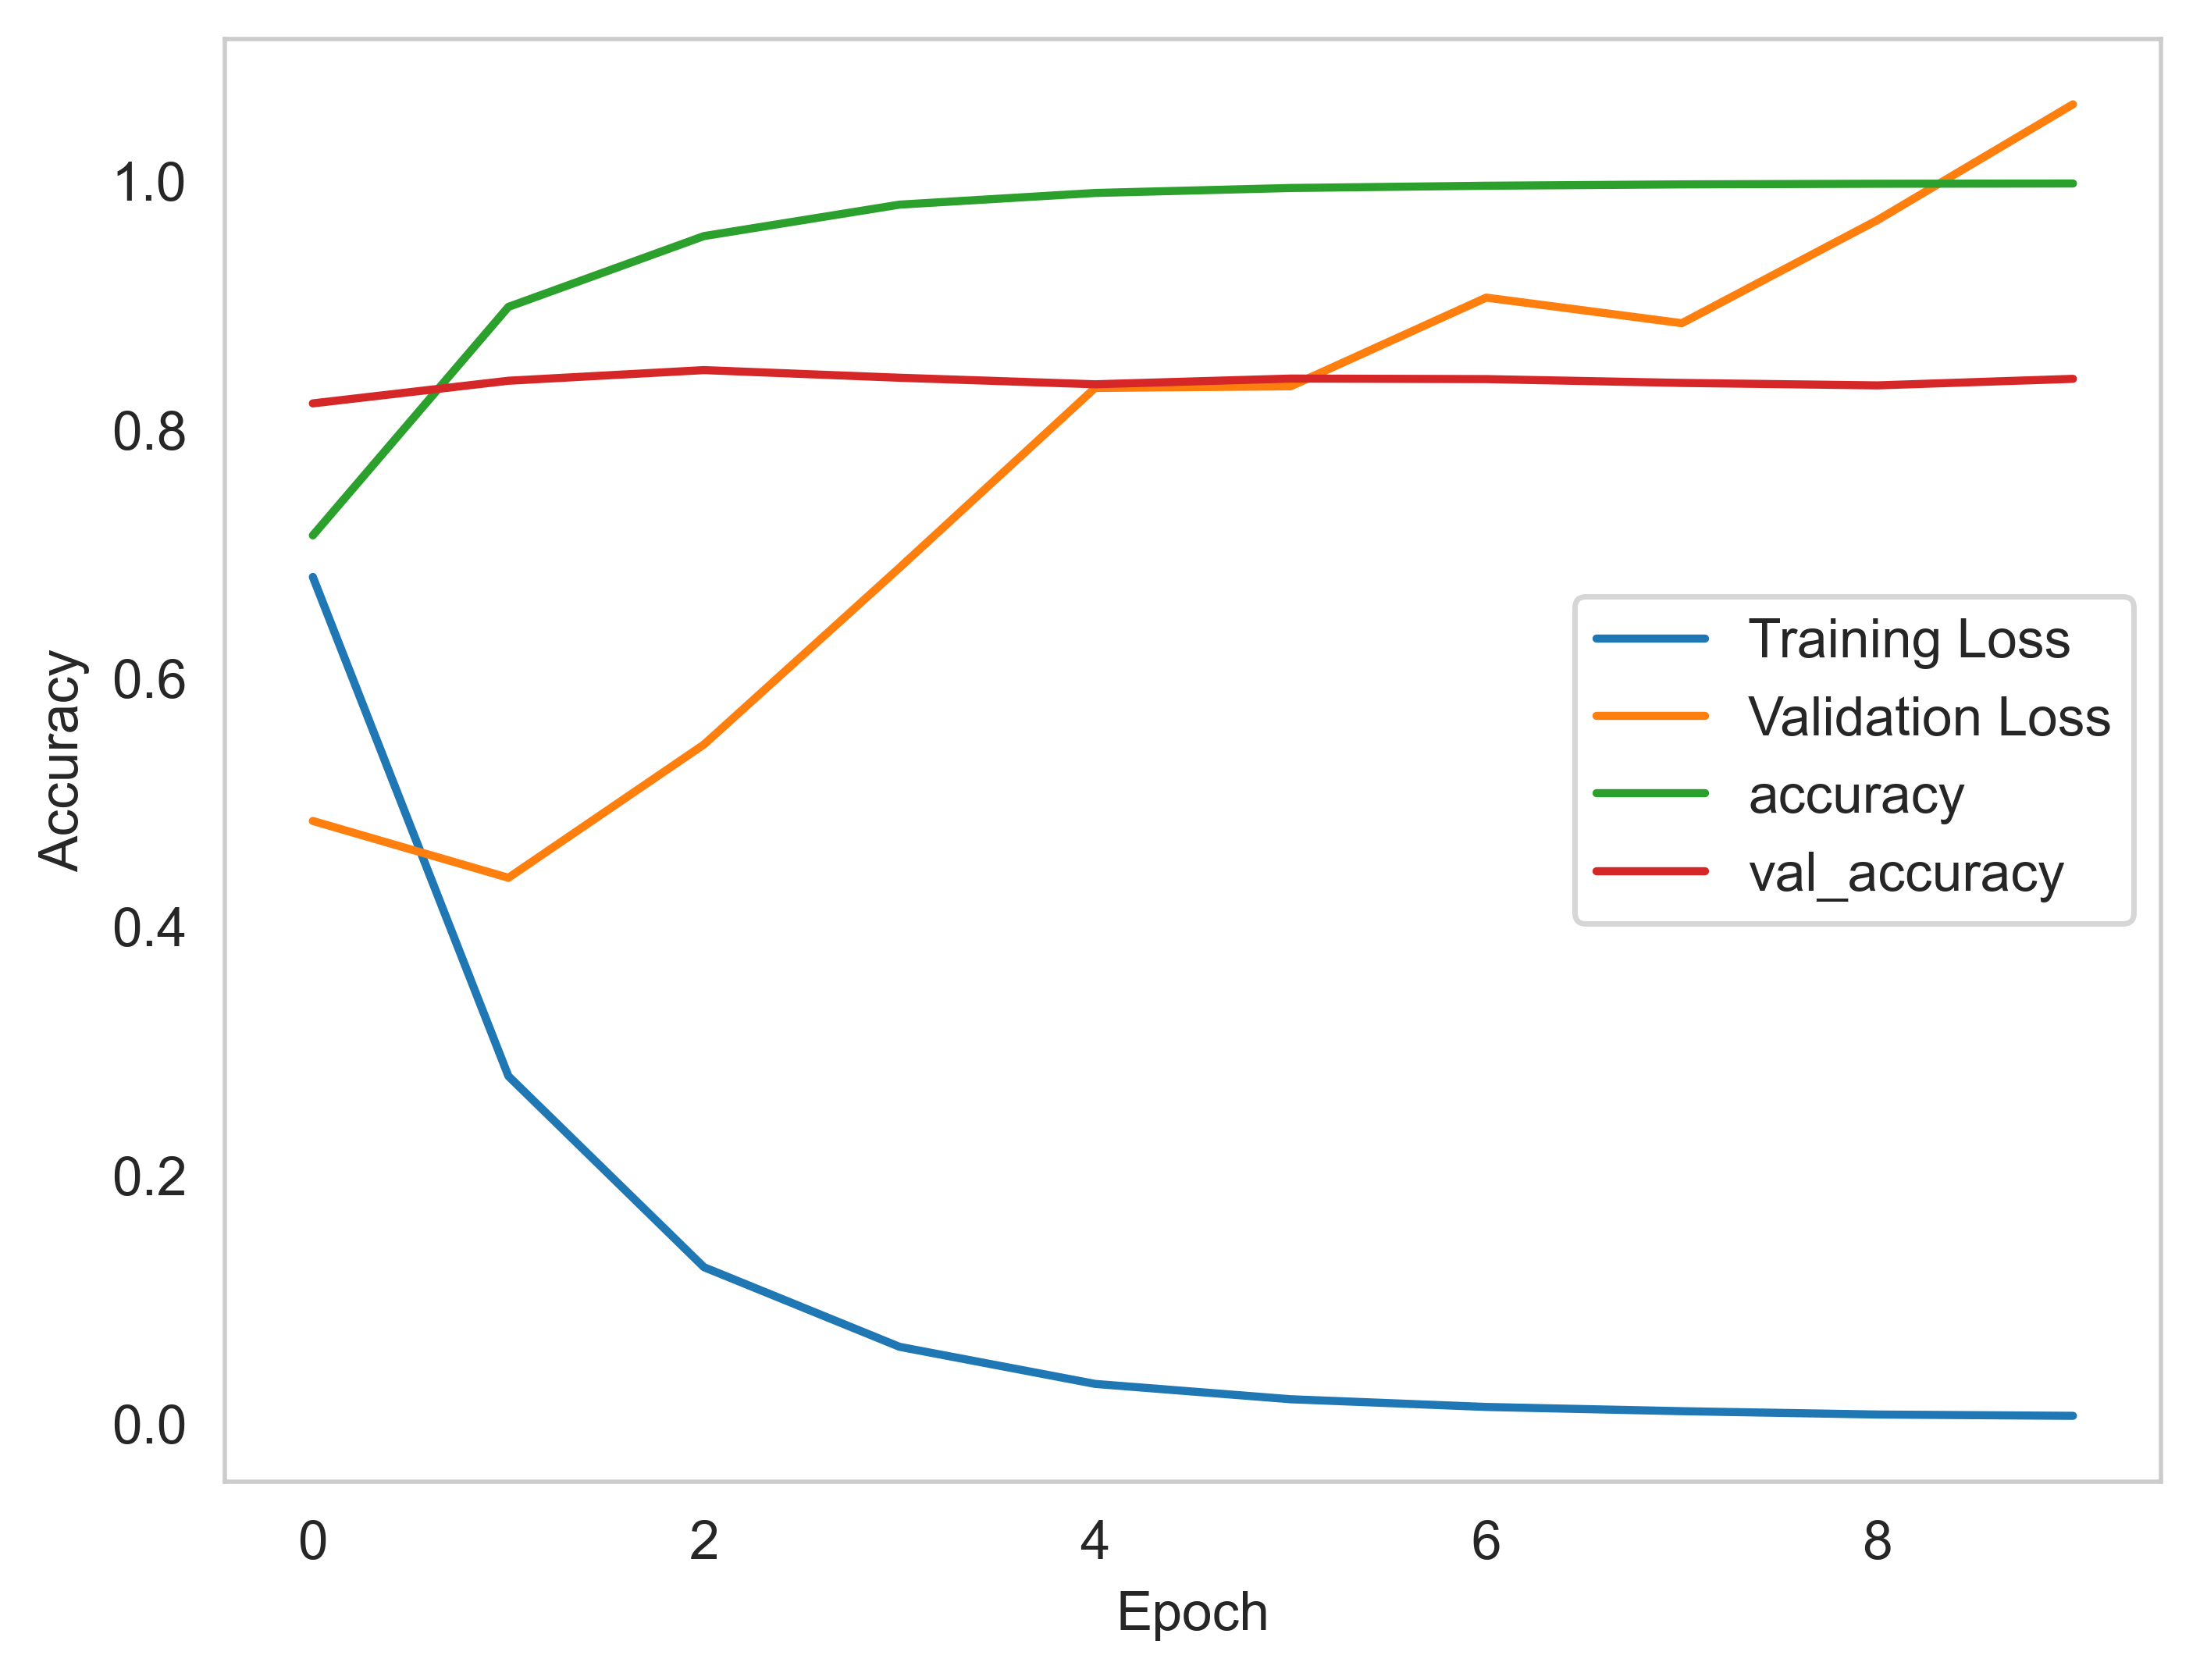

In [14]:
# Visualize training history (optional)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [15]:
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([2, 0, 2, ..., 2, 1, 2])

In [16]:
cm_cnn = confusion_matrix(y_test, y_pred_classes)
cm_cnn

array([[ 497,  122,   80],
       [  76, 2945,  202],
       [  72,  249, 1451]])

In [17]:
# printing confusion matrix
def plot_conf_mat(cm):
    class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, labels=[-1,0,1])
    plt.yticks(tick_marks, labels=class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

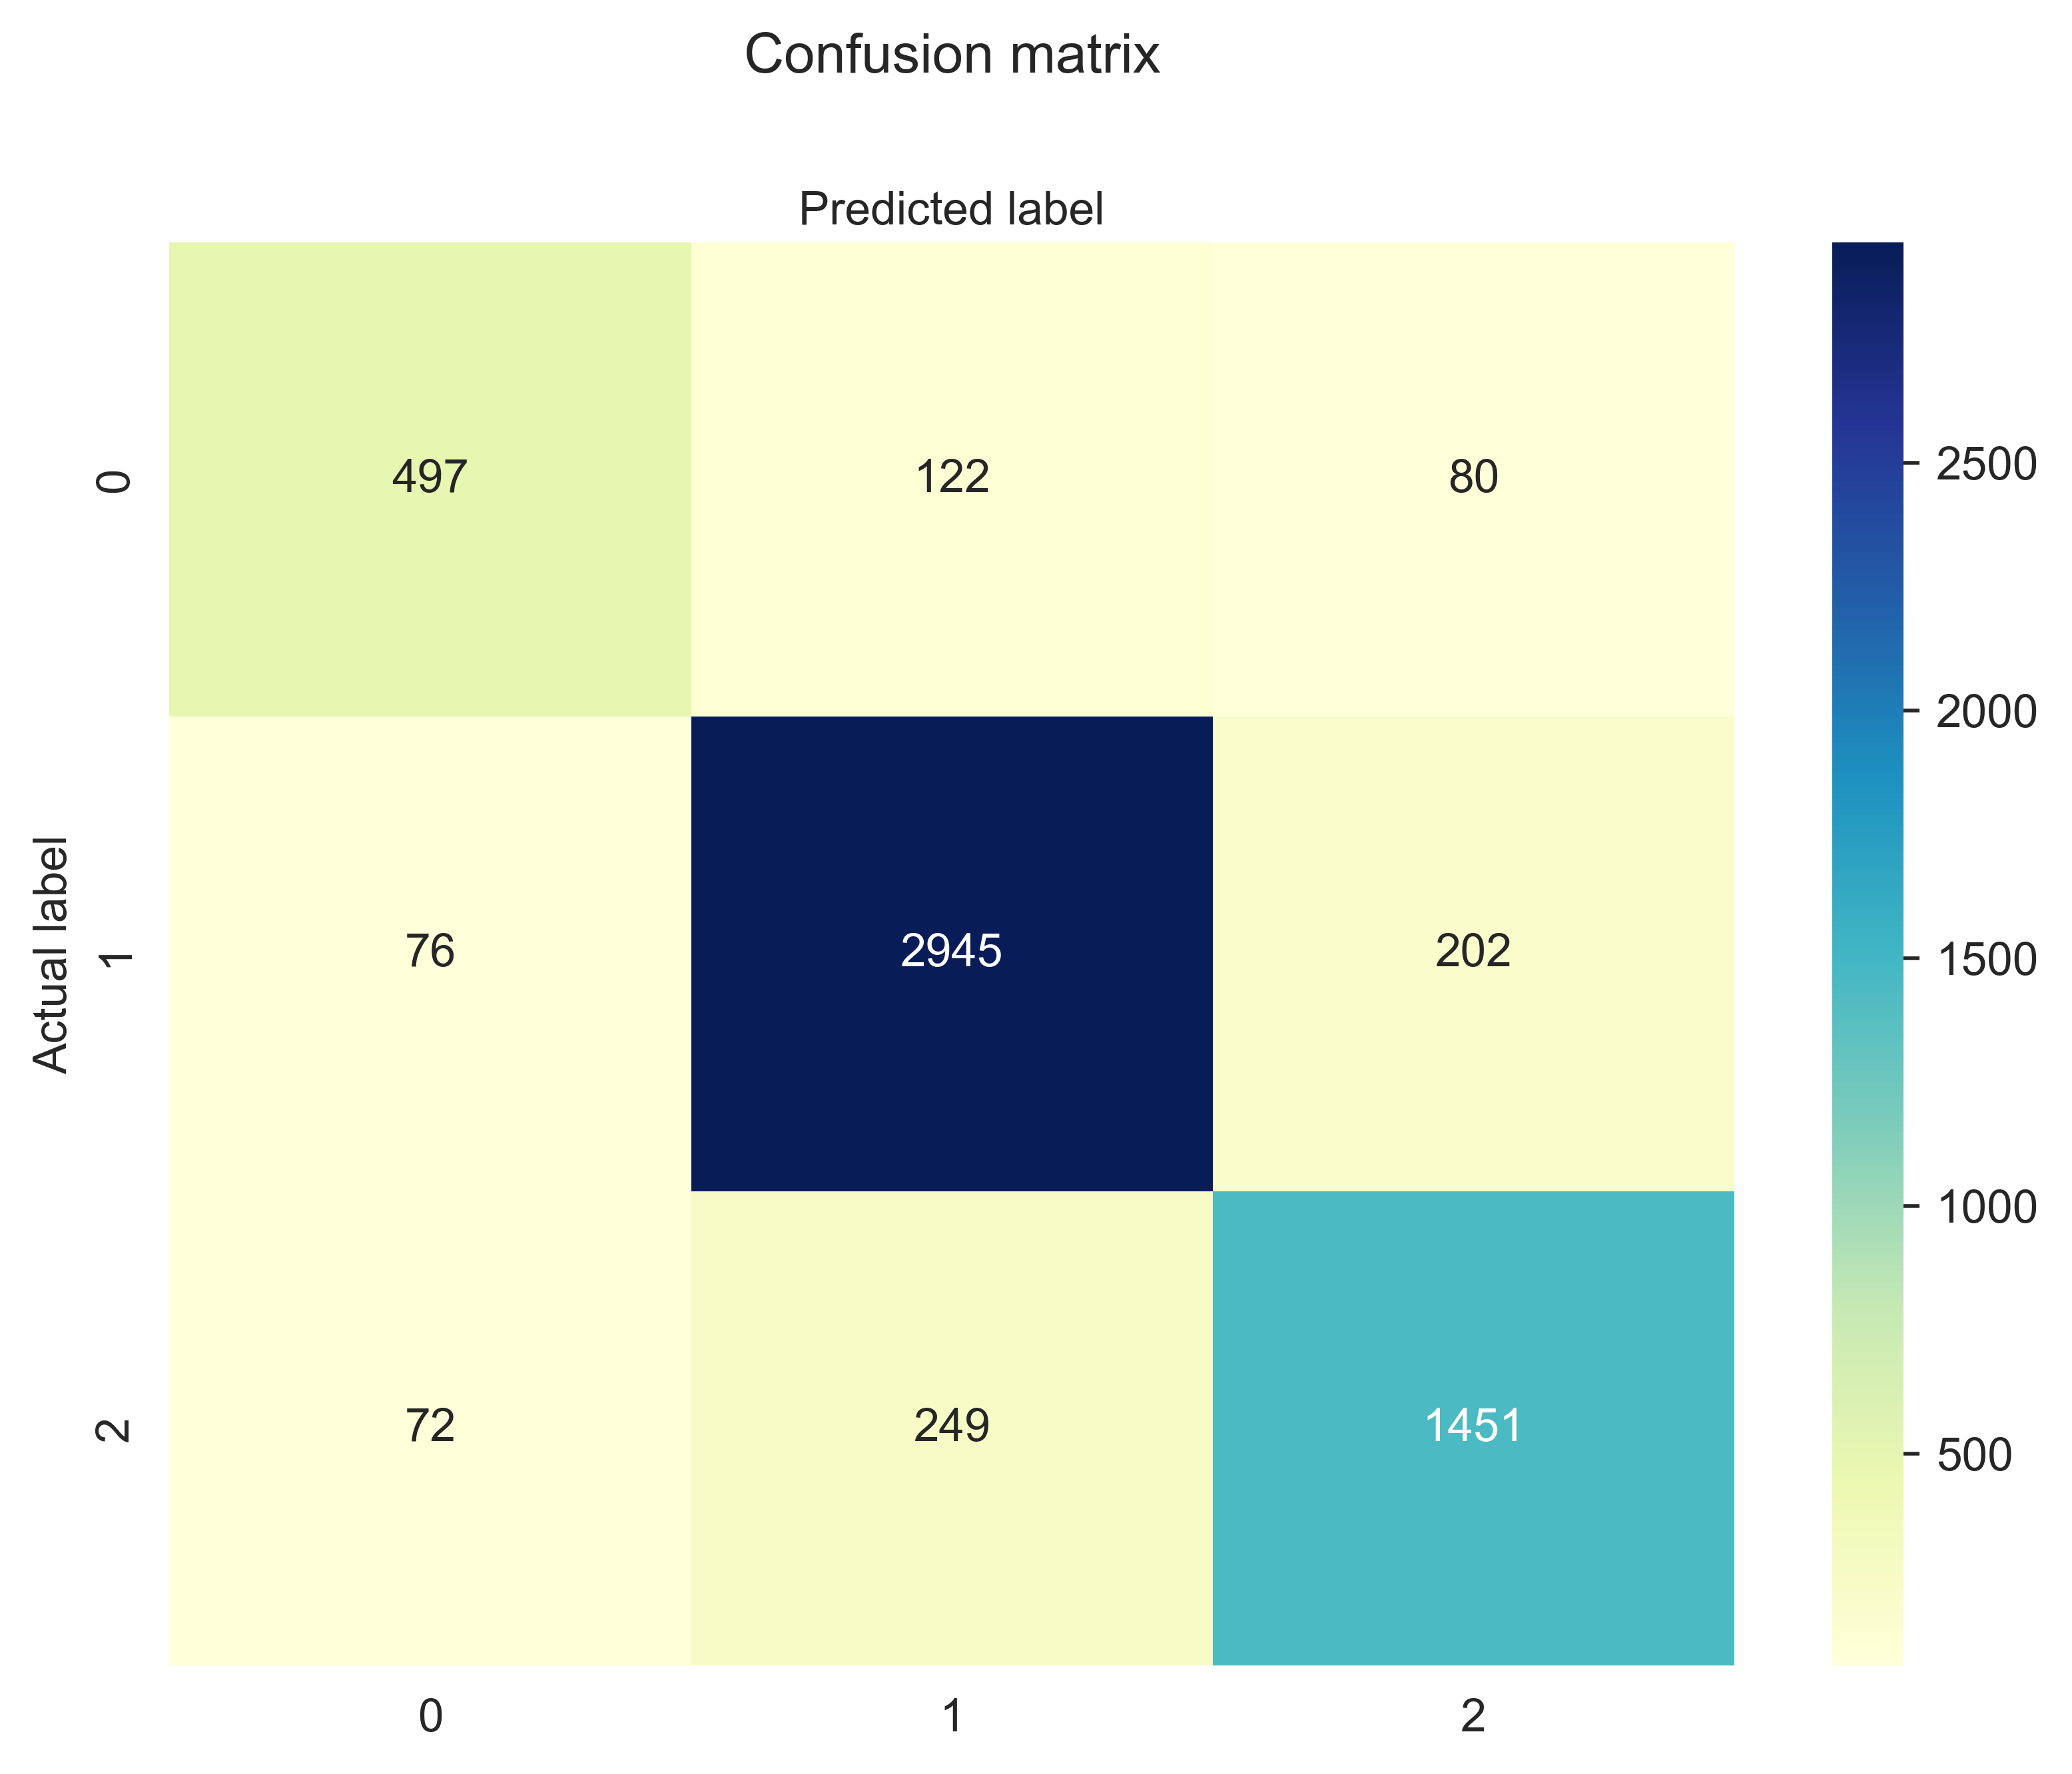

In [18]:
plot_conf_mat(cm_cnn)

In [19]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       699
           1       0.89      0.91      0.90      3223
           2       0.84      0.82      0.83      1772

    accuracy                           0.86      5694
   macro avg       0.83      0.81      0.82      5694
weighted avg       0.86      0.86      0.86      5694



## K-Fold Cross Validation

In [20]:
def create_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 100))
    model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Conv1D(filters=64, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [21]:
# Define number of folds
k_folds = 5

# Initialize lists to store per-fold histories
fold_accuracies = []
fold_val_accuracies = []
fold_losses = []
fold_val_losses = []

# Initialize KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_pad):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_pad[train_index], X_train_pad[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define and compile model
    model = create_model()  # Define your CNN model creation function
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold))
    
    # Collecting accuracy and loss history
    fold_accuracies.append(history.history['accuracy'])
    fold_val_accuracies.append(history.history['val_accuracy'])
    fold_losses.append(history.history['loss'])
    fold_val_losses.append(history.history['val_loss'])

Epoch 1/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6096 - loss: 0.8433 - val_accuracy: 0.8312 - val_loss: 0.4475
Epoch 2/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9005 - loss: 0.2741 - val_accuracy: 0.8575 - val_loss: 0.3888
Epoch 3/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9610 - loss: 0.1158 - val_accuracy: 0.8564 - val_loss: 0.4798
Epoch 4/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.8525 - val_loss: 0.5764
Epoch 5/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9930 - loss: 0.0247 - val_accuracy: 0.8580 - val_loss: 0.6819
Epoch 6/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9957 - loss: 0.0125 - val_accuracy: 0.8573 - val_loss: 0.7856
Epoch 7/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.8584 - val_loss: 0.8203
Epoch 8/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accu

In [22]:
# Calculating mean of metrics across all folds
mean_accuracy = np.mean(fold_accuracies, axis=0)
mean_val_accuracy = np.mean(fold_val_accuracies, axis=0)
mean_loss = np.mean(fold_losses, axis=0)
mean_val_loss = np.mean(fold_val_losses, axis=0)

# Printing the mean accuracy and loss
print(f"Mean Training Accuracy: {mean_accuracy[-1]:.6f}")
print(f"Mean Validation Accuracy: {mean_val_accuracy[-1]:.6f}")
print(f"Mean Training Loss: {mean_loss[-1]:.6f}")
print(f"Mean Validation Loss: {mean_val_loss[-1]:.6f}")

Mean Training Accuracy: 0.996652
Mean Validation Accuracy: 0.855406
Mean Training Loss: 0.011060
Mean Validation Loss: 0.915501


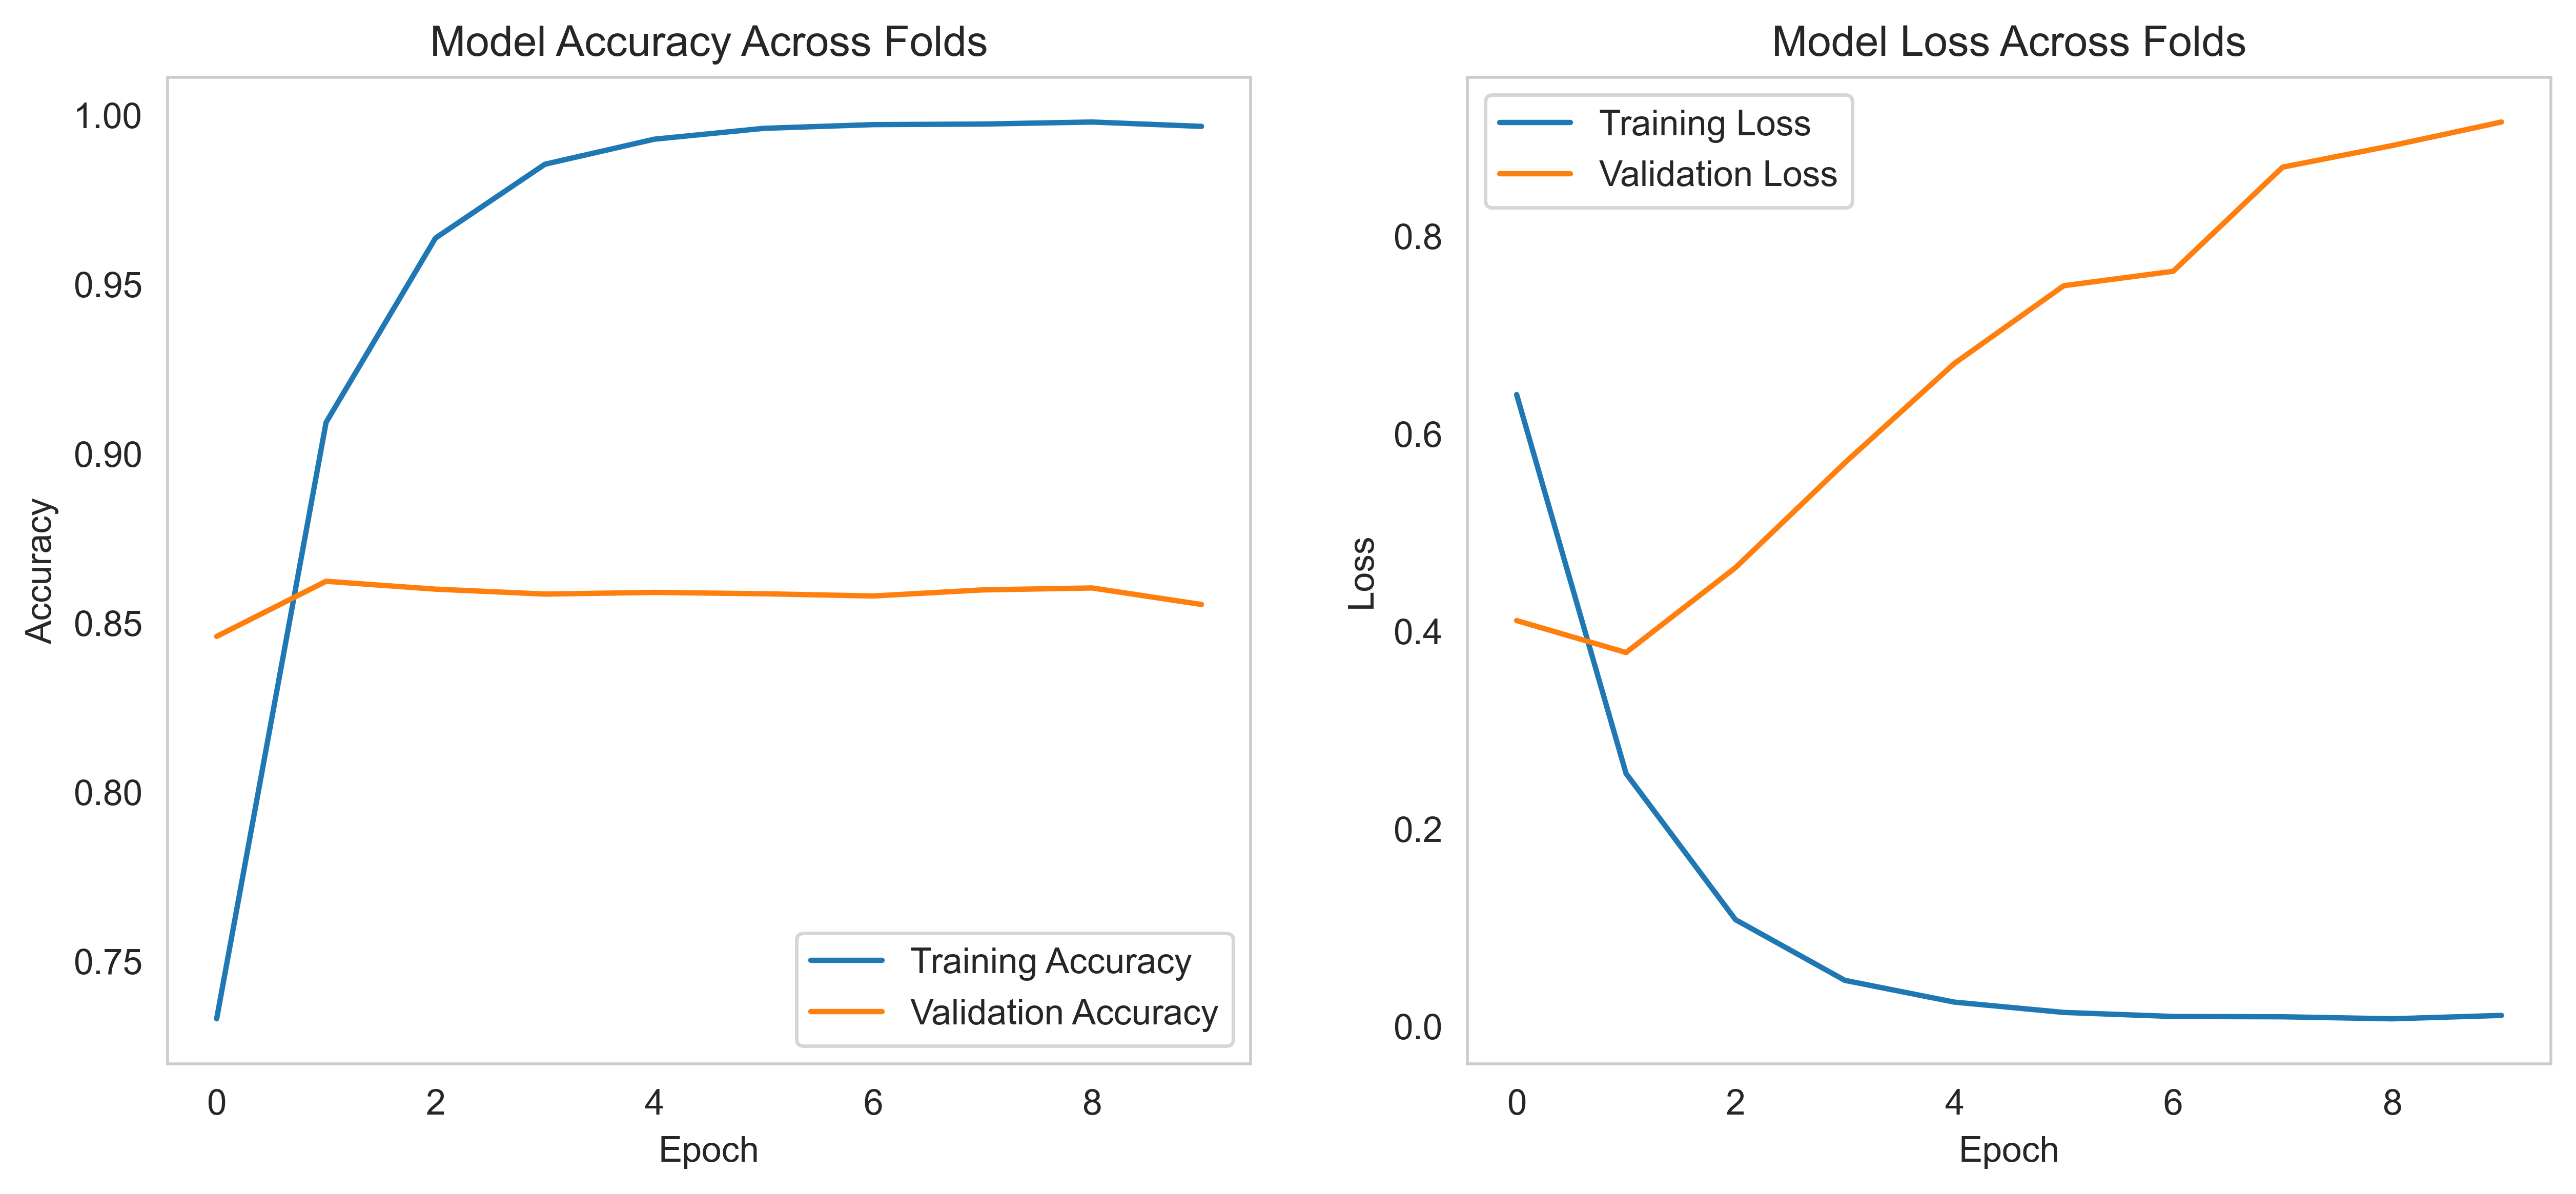

In [23]:
# Plotting model accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(mean_accuracy, label='Training Accuracy')
plt.plot(mean_val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(mean_loss, label='Training Loss')
plt.plot(mean_val_loss, label='Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()